test_700_1616_0_2252


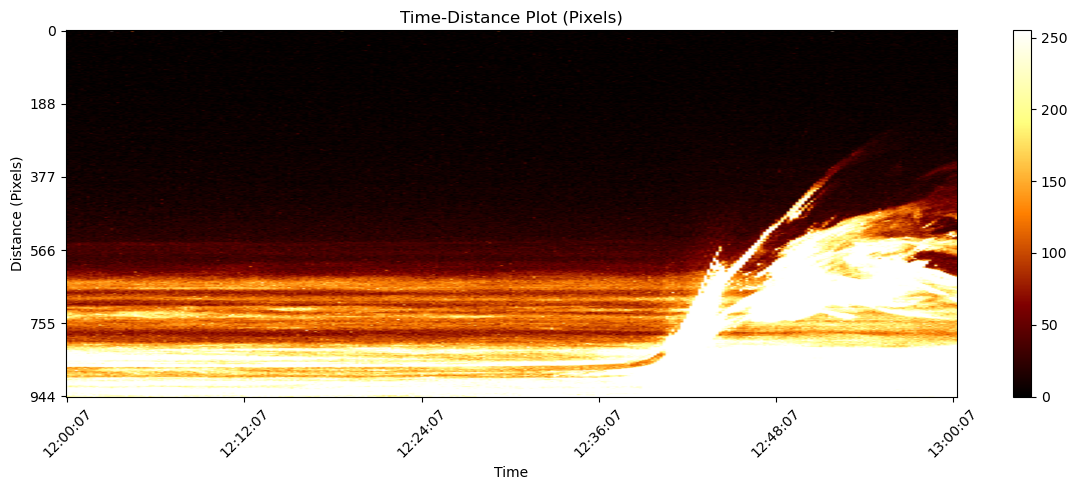

test_700_1616_0_2252


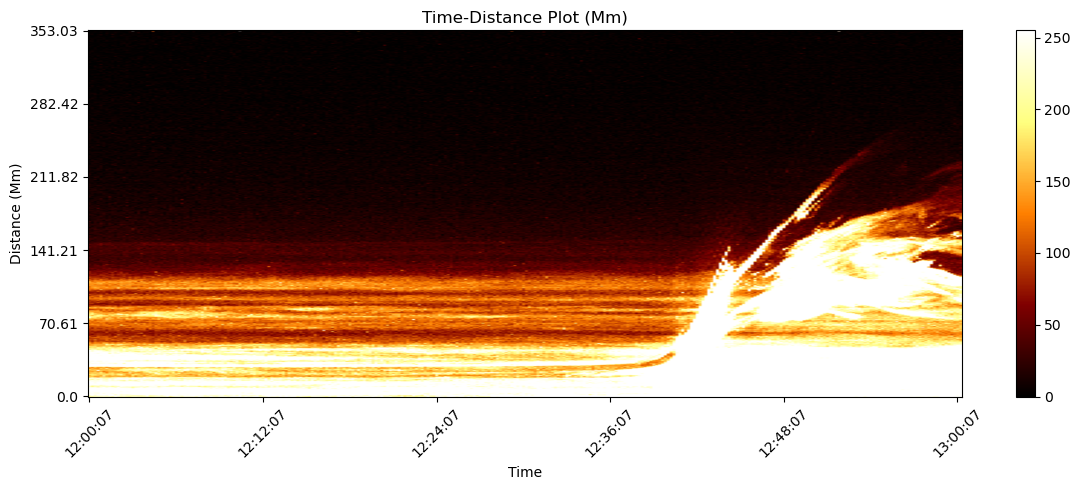

test_700_1616_0_2252


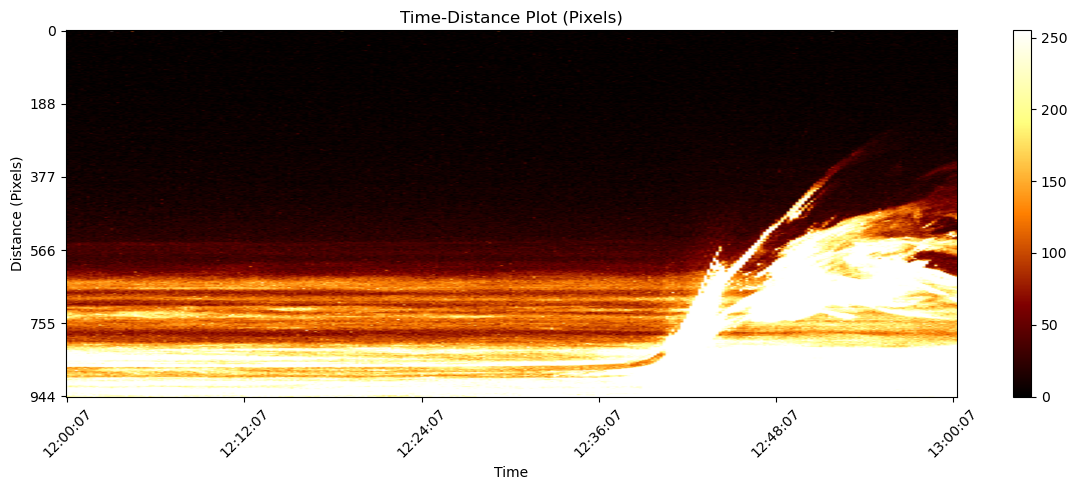

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from datetime import datetime

def extract_time_from_filename(filename):
    """从文件名中提取时间戳，返回时间对象。"""
    time_str = filename.split('.')[2]  # 提取 '2023-10-02T125931Z'
    #print(datetime.strptime(time_str, '%Y-%m-%dT%H%M%SZ'))
    return datetime.strptime(time_str, '%Y-%m-%dT%H%M%SZ')

def merge_stripes_by_time(directory_path):
    """从指定目录读取带有时间戳的图像文件，按时间顺序合并。"""
    image_files = sorted(
        [f for f in os.listdir(directory_path) if f.endswith(('.png', '.jpg', '.jpeg'))], 
        key=lambda x: extract_time_from_filename(x)
    )

    first_image = Image.open(os.path.join(directory_path, image_files[0])).convert('RGB')  # 统一转换为 RGB
    image_array = np.array(first_image)

    image_height, image_width = image_array.shape[:2]
    total_width = len(image_files) * image_width

    merged_image = np.zeros((image_height, total_width, 3), dtype=np.uint8)  # 统一使用 3 通道 (RGB)

    for i, image_file in enumerate(image_files):
        image = Image.open(os.path.join(directory_path, image_file)).convert('RGB') 
        image_array = np.array(image)
        merged_image[:, i * image_width:(i + 1) * image_width, :] = image_array
        t = extract_time_from_filename(image_file)
        #print(f"[{i}] {image_file} -> {t.strftime('%Y-%m-%d %H:%M:%S')}")


    return merged_image, image_files, image_height

def plot_time_distance_image(merged_image, image_files, d, source_dir, save_dir, num_ticks=5, unit='pixel', save_for_vt_plt=True):
    """绘制时间-距离图，可以选择纵轴单位（'pixel' 或 'Mm'）"""
    times = [extract_time_from_filename(f) for f in image_files]

    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    
    base_filename = os.path.basename(source_dir)
    print(base_filename)

    if save_for_vt_plt:
        plt.figure(figsize=(12, 5))
        plt.imshow(merged_image, aspect='auto', cmap='afmhot', origin='upper')

        plt.axis('off')
        plt.tight_layout(pad=0)  # 去除空白区域
        # 保存图像
        plt.savefig(os.path.join(save_dir, f"{base_filename}_time_dis_forvtplt.png"), bbox_inches='tight', pad_inches=0)
        plt.close()  # 关闭当前

    plt.figure(figsize=(12, 5))
    plt.imshow(merged_image, aspect='auto', cmap='afmhot', origin='upper')
    plt.xlabel("Time")
    plt.colorbar()

    # 设置时间轴
    time_labels = [t.strftime('%H:%M:%S') for t in times]
    tick_positions = np.linspace(0, merged_image.shape[1] - 1, len(image_files))
    tick_step = max(1, len(tick_positions) // num_ticks)
    tick_positions = tick_positions[::tick_step]
    time_labels = [time_labels[i] for i in range(0, len(time_labels), tick_step)]
    plt.xticks(tick_positions, time_labels, rotation=45)

    # 设置纵轴
    pixel_positions = np.linspace(0, merged_image.shape[0] - 1, 6)

    if unit == 'pixel':
        plt.title("Time-Distance Plot (Pixels)")
        plt.ylabel("Distance (Pixels)")
        plt.yticks(pixel_positions, pixel_positions.astype(int))
        plt.savefig(os.path.join(save_dir, f"{base_filename}_time_dis_PixUnit.png"))
    elif unit == 'Mm':
        mm_positions = np.linspace(0, d, 6)  # 转换为 Mm
        mm_positions = mm_positions[::-1]  # **倒序刻度**
        plt.title("Time-Distance Plot (Mm)")
        plt.ylabel("Distance (Mm)")
        plt.yticks(pixel_positions, np.round(mm_positions, 2)) 
        plt.savefig(os.path.join(save_dir, f"{base_filename}_time_dis_MmUnit.png"))

    plt.tight_layout()
    plt.show()

# 设定图像路径
whether_save_for_vt_plt=True  # if need a pure time-dis plt img for next step v-t plt, make this true, otherwise false
directory_path = '/data2/pqf_SDO_SolO/SDO/slice_from_each_img/test_700_1616_0_2252'
save_dir = '/data2/pqf_SDO_SolO/SDO/time_distance_plots'
d = 353.0294567059708  # 设定距离范围（单位：Mm）

# 合并图像
merged_image, image_files, image_height = merge_stripes_by_time(directory_path)

# 绘制时间-距离图（像素单位）
plot_time_distance_image(merged_image, image_files, d, directory_path, save_dir, num_ticks=5, unit='pixel')

# 绘制时间-距离图（Mm 单位）
plot_time_distance_image(merged_image, image_files, d, directory_path, save_dir, num_ticks=5, unit='Mm')

plot_time_distance_image(merged_image, image_files, d, directory_path, save_dir, num_ticks=5, unit='pixel', save_for_vt_plt=whether_save_for_vt_plt)

'''
for next step,

'''
